**базовые модели ML**

Евгений Борисов <esborisov@sevsu.ru>

----

In [1]:
# # показывать выдачу всех строк ячейки
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# import gzip
# import pickle

import numpy as np
import numpy.random as rng
# import pandas as pd
# import gc
from tqdm import tqdm

# from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [3]:
# tqdm.pandas ()
# pd.options.display.float_format = '{:,.2f}'.format

## LinearRegression + MSQE + GD

In [4]:
# from sklearn.datasets import fetch_california_housing
# from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

Xr,yr = make_regression(n_samples=100,n_features=1,noise=9.1, shuffle=True,)
# plt.scatter(x,y)
# plt.grid()

In [9]:
from lib.model.linear import LinearRegression
from lib.loss.msqe import MSQE
from lib.optimizer.gd import GD
# from lib.optimizer.gd import SGD
# from lib.optimizer.gd import EarlyStopping
from lib.optimizer.lrate import ConstLRA

%xdel model 

y_ = yr[:,np.newaxis]

model = LinearRegression(n_features=Xr.shape[1] )
# es=EarlyStopping(min_delta=1e-1,patience=4)
# lsh,lrh = SGD(MSQE(model),lra=lra,es=es).fit([Xr,y_],n_epoch=15,batch_size=10)
lsh,lrh = GD(MSQE(model),lra=ConstLRA(.9)).fit([Xr,y_],n_epoch=150)

100%|██████████| 150/150 [00:00<00:00, 1412.54it/s, loss=105, lr=0.9]


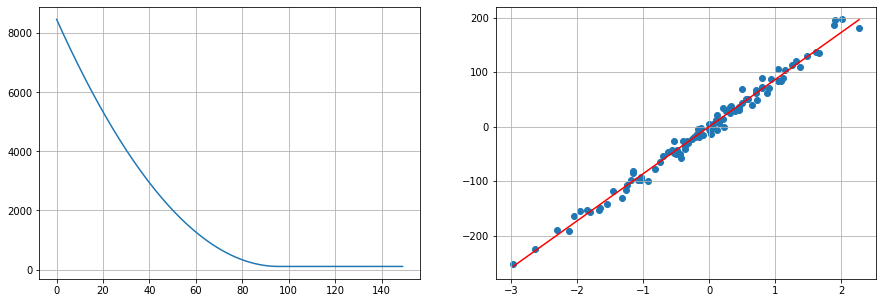

In [10]:

a = np.linspace(Xr.min(),Xr.max(),100)[:,np.newaxis]
p = model.predict(a)

fig,(ax0,ax1) = plt.subplots(1,2,figsize=(15,5))
ax0.plot(lsh)
ax0.grid()

ax1.scatter(Xr,yr)
ax1.plot(a,p,c='r')
ax1.grid()
